# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime as dt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [45]:
print(cities)

['skerries', 'malango', 'kuala terengganu', 'tofol', 'port-aux-francais', 'kievka', 'bredasdorp', 'edinburgh of the seven seas', 'margaret river', 'bikenibeu village', 'tshikapa', 'dudinka', 'jamestown', 'el campanario y oradel', 'fuvahmulah', 'albany', 'whitehorse', 'enewetak', 'launceston', 'bethel', 'howrah', 'karratha', 'rancho palos verdes', 'adamstown', 'invercargill', 'blackmans bay', 'vadso', 'olonkinbyen', 'natal', 'tiksi', 'abashiri', 'qaqortoq', 'sechura', 'la malbaie', 'taiohae', 'crane', 'mirny', 'waitangi', 'ulsteinvik', 'uturoa', 'hithadhoo', 'mantua', 'cabo san lucas', 'namibe', 'callao', 'bilibino', 'choyr', 'badger', 'badr hunayn', 'west island', 'lacombe', 'chonchi', 'rongelap', 'bratsk', 'port lincoln', "hayma'", 'beau vallon', 'bonne terre', 'aasiaat', 'longyearbyen', 'katsuura', "'ohonua", 'pisco', 'jinjing', 'nuevo casas grandes', 'mana', 'dryden', 'port elizabeth', 'qamdo', 'ihosy', 'nadym', 'tukrah', 'prince albert', 'constantia', 'meleuz', 'otaru', 'port mathu

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:


# city_data = []
# print("Beginning Data Retrieval     ")
# print("-----------------------------")
# record_count = 1
# set_count = 1
# for i, city in enumerate(cities):
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

    # try:
geo = f'http://api.openweathermap.org/geo/1.0/direct?q=London&appid={weather_api_key}'
geo_res = requests.get(geo).json()
lat = geo_res[0]['lat']
lon = geo_res[0]['lon']
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}'
res = requests.get(url).json()
# res['coord']['lat']
# res['coord']['lon']
# res['main']['temp_max']
# res['main']['humidity']
# res['clouds']['all']
# res['wind']['speed']
# res['sys']['country']
# res['dt']

        # city_lat = # YOUR CODE HERE
        # city_lng = # YOUR CODE HERE
        # city_max_temp = # YOUR CODE HERE
        # city_humidity = # YOUR CODE HERE
        # city_clouds = # YOUR CODE HERE
        # city_wind = # YOUR CODE HERE
        # city_country = # YOUR CODE HERE
        # city_date = # YOUR CODE HERE


In [47]:
geo = f'http://api.openweathermap.org/geo/1.0/direct?q=London&appid={weather_api_key}'
geo_res = requests.get(geo).json()
lat = geo_res[0]['lat']
lon = geo_res[0]['lon']
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}'
res = requests.get(url).json()
print(res)

{'coord': {'lon': -0.1276, 'lat': 51.5073}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.42, 'feels_like': 285.68, 'temp_min': 285.03, 'temp_max': 287.33, 'pressure': 1022, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1686082778, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1686023161, 'sunset': 1686082351}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [48]:
# Set the API base URL
url = 'api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    geocoding_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}'
    

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        geo_res = requests.get(geocoding_url).json()
        lat = geo_res[0]['lat']
        lon = geo_res[0]['lon']
        city_url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=metric'
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | skerries
City not found. Skipping...
Processing Record 2 of Set 1 | malango
Processing Record 3 of Set 1 | kuala terengganu
Processing Record 4 of Set 1 | tofol
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | kievka
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | bikenibeu village
City not found. Skipping...
Processing Record 11 of Set 1 | tshikapa
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | el campanario y oradel
Processing Record 15 of Set 1 | fuvahmulah
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | enewetak
Processing Record 19 of Set 1 | launceston
Processing Record 20 of Set 1 | bethel
Processing

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malango,-2.9627,119.9001,18.27,97,23,0.93,ID,1686082652
1,kuala terengganu,5.3296,103.1383,26.66,83,100,1.29,MY,1686082899
2,tofol,5.3260,163.0087,28.43,76,21,3.41,FM,1686082900
3,port-aux-francais,-49.3498,70.2200,2.21,84,100,9.75,TF,1686082901
4,kievka,54.3963,62.8787,17.93,92,88,2.35,RU,1686082901


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malango,-2.9627,119.9001,18.27,97,23,0.93,ID,1686082652
1,kuala terengganu,5.3296,103.1383,26.66,83,100,1.29,MY,1686082899
2,tofol,5.3260,163.0087,28.43,76,21,3.41,FM,1686082900
3,port-aux-francais,-49.3498,70.2200,2.21,84,100,9.75,TF,1686082901
4,kievka,54.3963,62.8787,17.93,92,88,2.35,RU,1686082901


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

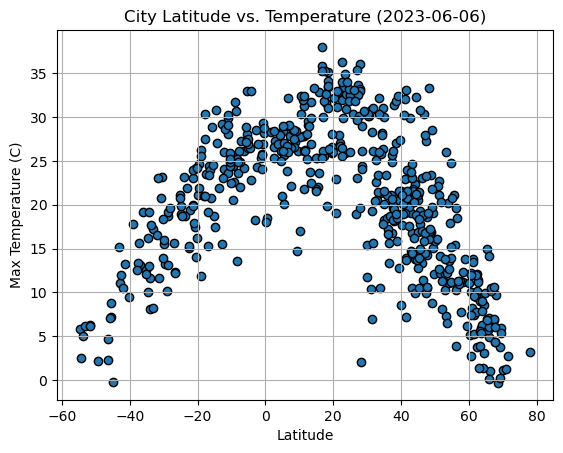

In [111]:
# Build scatter plot for latitude vs. temperature
local_time = time.strftime("%Y-%m-%d", time.localtime())
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Max Temp', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Max Temperature (C)')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Temperature ({local_time})')
ax.grid(visible=True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

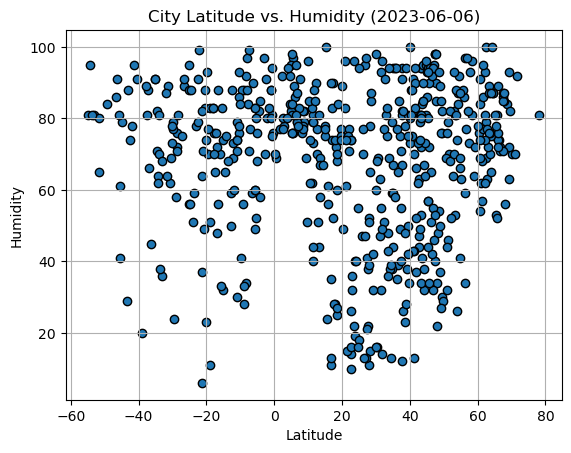

In [112]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Humidity', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Humidity ({local_time})')
ax.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

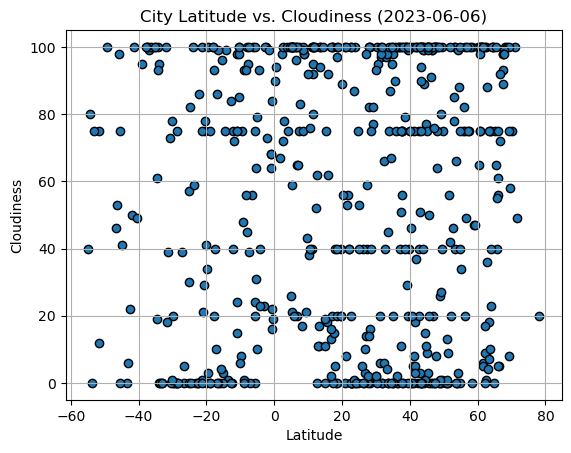

In [113]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Cloudiness', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Cloudiness ({local_time})')
ax.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

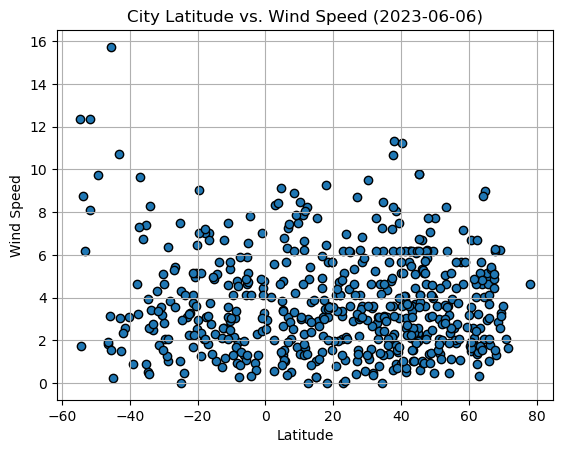

In [114]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()
ax.scatter(data=city_data_df, x='Lat', y='Wind Speed', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Wind Speed ({local_time})')
ax.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [127]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), 'r')

In [116]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kuala terengganu,5.3296,103.1383,26.66,83,100,1.29,MY,1686082899
2,tofol,5.3260,163.0087,28.43,76,21,3.41,FM,1686082900
4,kievka,54.3963,62.8787,17.93,92,88,2.35,RU,1686082901
9,dudinka,69.4061,86.1751,5.92,63,8,3.26,RU,1686082905
11,el campanario y oradel,27.4713,-99.6193,33.66,41,40,1.54,MX,1686082906


In [117]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malango,-2.9627,119.9001,18.27,97,23,0.93,ID,1686082652
3,port-aux-francais,-49.3498,70.2200,2.21,84,100,9.75,TF,1686082901
5,bredasdorp,-34.5331,20.0428,10.04,71,61,0.51,ZA,1686082902
6,edinburgh of the seven seas,-37.0676,-12.3108,13.11,66,99,9.63,SH,1686082903
7,margaret river,-33.9532,115.0769,11.66,70,95,8.28,AU,1686082903


###  Temperature vs. Latitude Linear Regression Plot

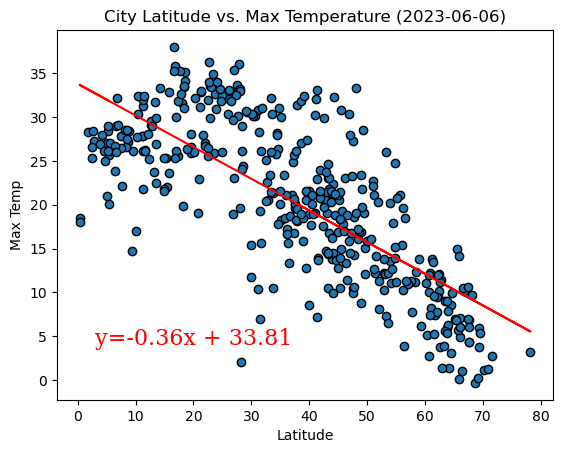

In [150]:
# Linear regression on Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Max Temp', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Max Temp')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Max Temperature ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Max Temp']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Max Temp']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Max Temp']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(3, 4, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)

# Show plot
plt.show()

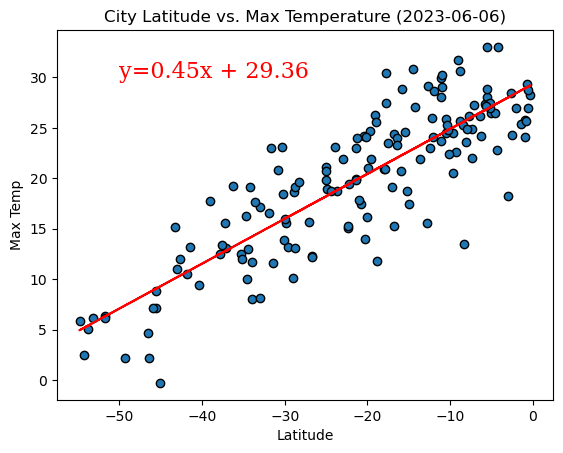

In [149]:
# Linear regression on Southern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Max Temp', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Max Temp')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Max Temperature ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Max Temp']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Max Temp']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Max Temp']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 30, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09077336793017238


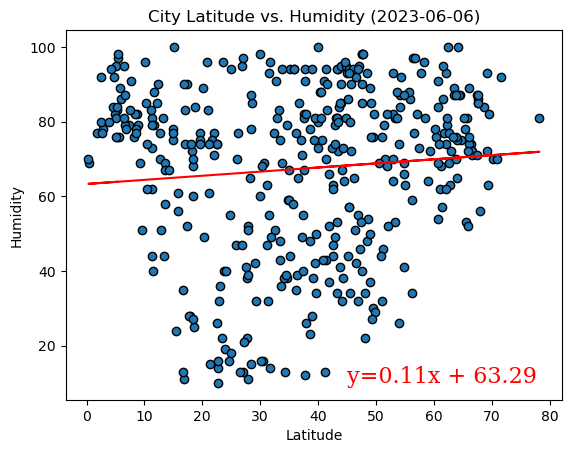

In [159]:
# Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Humidity', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Humidity ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Humidity']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Humidity']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Humidity']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(45, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

The r-value is: -0.003678092746596681


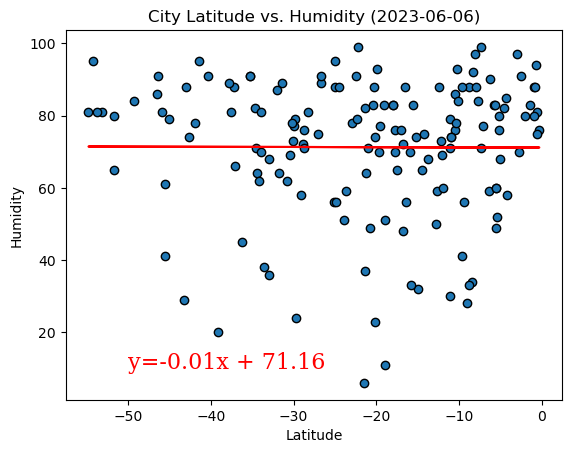

In [178]:
# Southern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Humidity', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Humidity ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Humidity']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Humidity']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Humidity']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03422995106729734


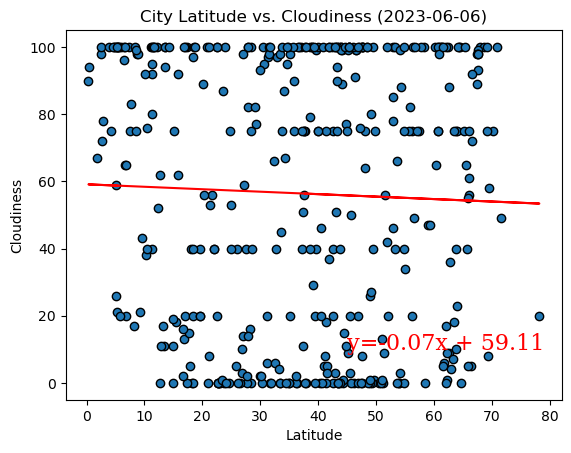

In [177]:
# Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Cloudiness', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Cloudiness ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Cloudiness']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Cloudiness']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Cloudiness']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(45, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

The r-value is: 0.037267329701501734


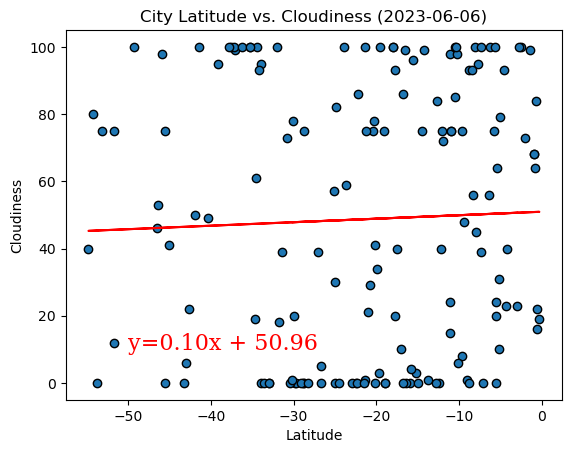

In [176]:
# Southern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Cloudiness', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Cloudiness ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Cloudiness']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Cloudiness']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Cloudiness']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.028671775872823504


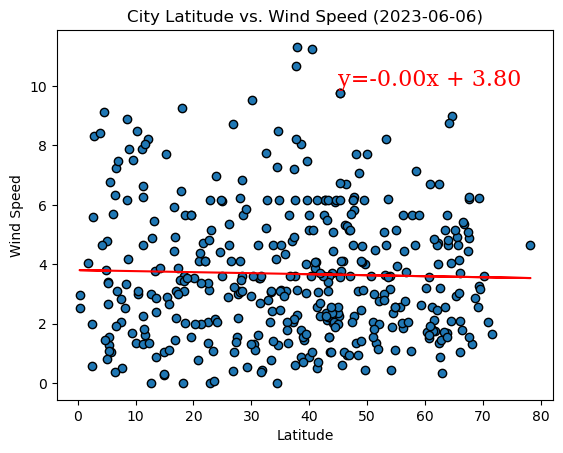

In [167]:
# Northern Hemisphere
# Build the scatter plots
fig, ax = plt.subplots()
ax.scatter(data=northern_hemi_df, x='Lat', y='Wind Speed', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Wind Speed ({local_time})')
lin_reg(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Wind Speed']))
r, p = st.pearsonr(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Wind Speed']))
z = np.polyfit(np.array(northern_hemi_df['Lat']), np.array(northern_hemi_df['Wind Speed']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(45, 10, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

The r-value is: -0.23939013817061994


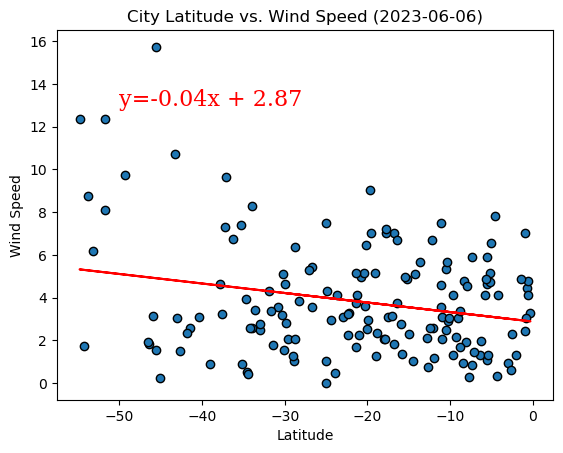

In [175]:
# Southern Hemisphere
fig, ax = plt.subplots()
ax.scatter(data=southern_hemi_df, x='Lat', y='Wind Speed', edgecolors='black')

# Incorporate the other graph properties
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
ax.set_title(f'City Latitude vs. Wind Speed ({local_time})')
lin_reg(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Wind Speed']))
r, p = st.pearsonr(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Wind Speed']))
z = np.polyfit(np.array(southern_hemi_df['Lat']), np.array(southern_hemi_df['Wind Speed']), 1)
font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 16}
ax.text(-50, 13, f'y={z[0]:.2f}x + {z[1]:.2f}', fontdict=font)
print(f'The r-value is: {r}')

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE